<a href="https://colab.research.google.com/github/kiseonjeong/computer-vision/blob/2-study-the-super-resolution-algorithm/super%20resolution/cifar10_vdsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Set input layer
inputs = keras.Input(shape=(128, 128, 3), name='img')

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=3, kernel_size=3, padding='same')(x)

# Set output layer
outputs = layers.add([x, inputs])

# Set a VDSR model
model = keras.Model(inputs, outputs, name='VDSR')
model.summary()

Model: "VDSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                              

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

170508288/170498071 [==============================] - 4s 0us/step


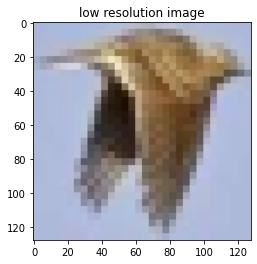

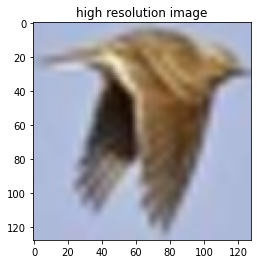

In [4]:
# Load image data
ishape = 128
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Reduce the dataset
train_image = train_images[0:10000]
test_image = test_images[0:1000]

x_train = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_NEAREST) for img in train_image])
x_test = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_NEAREST) for img in test_image])

y_train = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in train_image])
y_test = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in test_image])

# Show an example image
example_idx = 123
plt.figure('LR')
plt.imshow(x_train[example_idx])
plt.title('low resolution image')
plt.figure('HR')
plt.imshow(y_train[example_idx])
plt.title('high resolution image')
plt.show()

In [5]:
# Train the model
def PSNR(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=255.0)

def SSIM(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=255.0)

model.compile(optimizer=keras.optimizers.Adam(0.0001, clipvalue=1.0), loss='mse', metrics=[PSNR, SSIM, 'accuracy'])
#model.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.9, clipvalue=1.0), loss='mse', metrics=[PSNR, SSIM, 'accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', test_scores[0])
print('Test mse:', test_scores[1])

# Save entire model to a HDF5 file
model.save('VDSR.h5')

Epoch 1/10
125/125 [==============================] - 309s 2s/step - loss: 43.0379 - PSNR: 33.3871 - SSIM: 0.9171 - accuracy: 0.8975 - val_loss: 12.9011 - val_PSNR: 37.6545 - val_SSIM: 0.9660 - val_accuracy: 0.8931
Epoch 2/10
125/125 [==============================] - 290s 2s/step - loss: 9.5399 - PSNR: 39.2966 - SSIM: 0.9715 - accuracy: 0.9147 - val_loss: 7.3989 - val_PSNR: 40.4649 - val_SSIM: 0.9754 - val_accuracy: 0.9139
Epoch 3/10
125/125 [==============================] - 289s 2s/step - loss: 6.9846 - PSNR: 40.9186 - SSIM: 0.9769 - accuracy: 0.9188 - val_loss: 5.8972 - val_PSNR: 41.6960 - val_SSIM: 0.9792 - val_accuracy: 0.9158
Epoch 4/10
125/125 [==============================] - 290s 2s/step - loss: 4.4692 - PSNR: 42.9789 - SSIM: 0.9842 - accuracy: 0.9232 - val_loss: 2.8523 - val_PSNR: 44.7033 - val_SSIM: 0.9892 - val_accuracy: 0.9259
Epoch 5/10
125/125 [==============================] - 289s 2s/step - loss: 2.6019 - PSNR: 45.1134 - SSIM: 0.9904 - accuracy: 0.9288 - val_loss: 2.

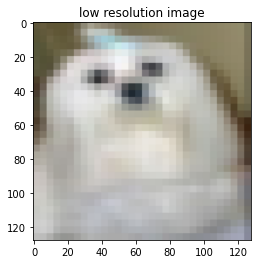

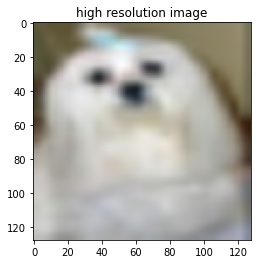

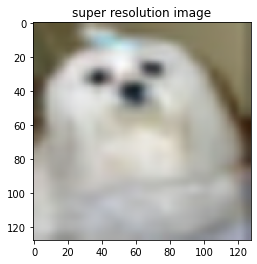

In [8]:
# Set real test image
img = train_images[20001]
lr = np.array(cv.resize(img, (ishape, ishape), interpolation=cv.INTER_NEAREST))
hr = np.array(cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC))
test_input = np.reshape(lr, (1, ishape, ishape, 3))

# Predict a result
sr = model.predict(test_input)
plt.figure('LR')
plt.title('low resolution image')
plt.imshow(lr)
plt.figure('HR')
plt.title('high resolution image')
plt.imshow(hr)
plt.figure('SR')
plt.title('super resolution image')
plt.imshow(sr[0] / 255.0)
plt.show()